<a href="https://colab.research.google.com/github/turkson-michael/Machine-learning-/blob/main/pytorch_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural network classification with PyTorch

In [ ]:
import pandas as pd
import numpy as np
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# make 100 samples
n_samples = 1000

#Create circles
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)


len(X), len(y)

(1000, 1000)

In [ ]:
print(f'first 5  samples of X: {X[:5]}')

first 5  samples of X: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]


In [ ]:
print(f'first 5  samples of y: {y[:5]}')

first 5  samples of y: [1 1 1 1 0]


In [ ]:
circles = pd.DataFrame({'X1': X[:,0],
                        'X2': X[:,1],
                        'label': y})

In [ ]:
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
circles.label.value_counts()

,count
label,
1,500
0,500


In [ ]:
circles.columns

Index(['X1', 'X2', 'label'], dtype='object')

#VISUALIZE VISUALIZE VISUALIZE

In [ ]:
import matplotlib.pyplot as plt

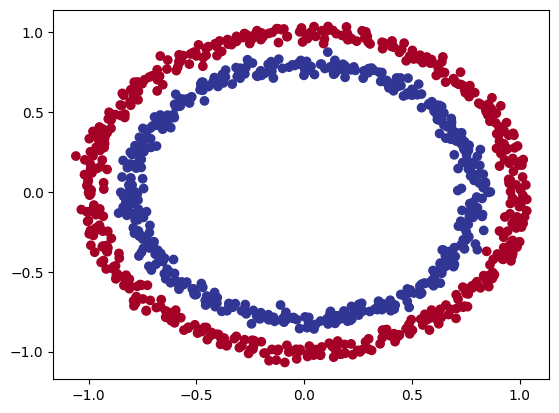

In [ ]:
plt.scatter(x=circles['X1'],
            y=circles['X2'],
            c=y,
            cmap=plt.cm.RdYlBu)

# Check input and output shapes


In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# vuew the first example of features and labels

X_sample = X[0]
y_sample = y[0]


print(f'values for one sample of X: {X_sample} and the same for y: {y_sample}')

values for one sample of X: [0.75424625 0.23148074] and the same for y: 1


# Turn data into tensors and create train and test splits

In [ ]:
import torch

In [ ]:
type(X)

numpy.ndarray

In [ ]:
#Turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
type(X),   X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

# Split into training and testing data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,
                                                 y,
                                                 test_size=0.2,
                                                 random_state=42)

In [ ]:
len(X_train),len(X_test)

(800, 200)

# Building a model
 - setup a device agonistic code
 - Construct a model
 - Define a loss and optimizer function
 -Create a training and test loop

In [ ]:
import torch
from torch import nn


In [ ]:
#Make device agonistic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [ ]:
#1. construct a model that subclass nn.Module

class CircleModelVO(nn.Module):
  def __init__(self):
    super().__init__()

    #2. Create a 2 nn.Linear capable of handling the shapes of the data
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

#3. Define a forward method ()
  def forward(self, x):
    return self.layer_2(self.layer_1(x))




#4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelVO().to(device)
model_0


CircleModelVO(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cpu'

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

### Replicate the model using Sequential()

-model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5,),
    nn.Linear(in_features=5, out_features=1)
).to(device)


-------------
-----class CircleModelVO(nn.Module):
----def __init__(self):
    super().__init__()

    #2. Create a 2 nn.Linear capable of handling the shapes of the data
    #self.layer_1 = nn.Linear(in_features=2, out_features=5)
    #self.layer_2 = nn.Linear(in_features=5, out_features=1)


    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=5),
        nn.Linear(in_features=5, out_features=1)
    )
---- Define a forward method ()
  def forward(self, x):
    #return self.layer_2(self.layer_1(x))
    return self.two_linear_layers(x)------

# MAKING PREDICTIONS

In [ ]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5,),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.5452, -0.2487],
                      [ 0.1551,  0.4841],
                      [-0.4717, -0.0965],
                      [ 0.5338,  0.1402],
                      [ 0.5665,  0.0879]])),
             ('0.bias', tensor([-0.0164, -0.4589,  0.2989,  0.4231, -0.0462])),
             ('1.weight',
              tensor([[-0.2240, -0.3714, -0.2272, -0.0063,  0.1516]])),
             ('1.bias', tensor([-0.2615]))])

In [ ]:
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f'length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}')
print(f'length of test samples: {len(X_test)}, shape: {X_test.shape}')
print(f'\nFirst 10 predictions: {torch.round(untrained_preds[:10])}')
print(f'\nFirst 10 labels: {y_test[:10]}')


length of predictions: 200, shape: torch.Size([200, 1])
length of test samples: 200, shape: torch.Size([200, 2])

First 10 predictions: tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]])

First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## Seeting up LOSS AND OPTIMIZERS FUNCTION

In [ ]:
loss_fn = nn.BCEWithLogitsLoss() #HAS SIGMOID ACTIVATION FUNC BUILT-IN

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


### CAlculate the Accuracy

In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## tRAINING MODEL
1. Forward pass
2. calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step

In [ ]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
with torch.inference_mode():
 y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.2300],
        [-0.2510],
        [-0.1438],
        [-0.2546],
        [-0.0943]])

In [ ]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4427],
        [0.4376],
        [0.4641],
        [0.4367],
        [0.4765]])

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
y_preds

#in full (logits --> pred_probs ---> pred_labels)

y_pred_labels =torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels


#Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#Get rid of extra dimensions
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [ ]:
torch.manual_seed(42)

#Epochs
epochs = 100


#Put data to target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)


# Building training and evaluation loop

for epoch in range(epochs):
  ### Training
  model_0.train()


  #1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) #--> turns logits into pre probs  to pred labels

  #2. Calculate loss/accuracy
  loss = loss_fn(y_logits,  #BCEWithLogitsLoss expects raw logits as input
                 y_train)

  acc = accuracy_fn(y_true=y_train, y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Backpropagation
  loss.backward()

  #5. Optimizer step (Gradient descent)
  optimizer.step()

  ###Testing
  model_0.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate loss/accuracy
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


    ## Print out what is happening
    if epoch % 10 == 0:
      print(f'Epoch: {epoch}| Loss: {loss:.5f}, Acc: {acc:.5f} % | Test loss: {test_loss:.2f}, TEST ACC: {test_acc:.2f}%')

Epoch: 0| Loss: 0.69736, Acc: 50.00000 % | Test loss: 0.70, TEST ACC: 50.00%
Epoch: 10| Loss: 0.69542, Acc: 50.00000 % | Test loss: 0.69, TEST ACC: 50.00%
Epoch: 20| Loss: 0.69455, Acc: 41.25000 % | Test loss: 0.69, TEST ACC: 41.50%
Epoch: 30| Loss: 0.69414, Acc: 46.00000 % | Test loss: 0.69, TEST ACC: 49.00%
Epoch: 40| Loss: 0.69391, Acc: 47.12500 % | Test loss: 0.69, TEST ACC: 50.00%
Epoch: 50| Loss: 0.69377, Acc: 48.00000 % | Test loss: 0.69, TEST ACC: 49.50%
Epoch: 60| Loss: 0.69367, Acc: 48.25000 % | Test loss: 0.69, TEST ACC: 51.00%
Epoch: 70| Loss: 0.69358, Acc: 48.75000 % | Test loss: 0.69, TEST ACC: 51.00%
Epoch: 80| Loss: 0.69351, Acc: 48.75000 % | Test loss: 0.69, TEST ACC: 51.00%
Epoch: 90| Loss: 0.69346, Acc: 48.87500 % | Test loss: 0.69, TEST ACC: 51.00%


## 4 Make predictions and evaluate the model



In [ ]:
import requests

In [ ]:
from pathlib import Path

#Download helper functions from Learn Pytorch repo (if its not already downloaded)

if Path("helper_functions.py").is_file():
  print('helper functions.py already exists, skipping download')
else:
  print('Download helper_functions.py')
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

Download helper_functions.py


In [ ]:
from helper_functions import plot_predictions, plot_decision_boundary

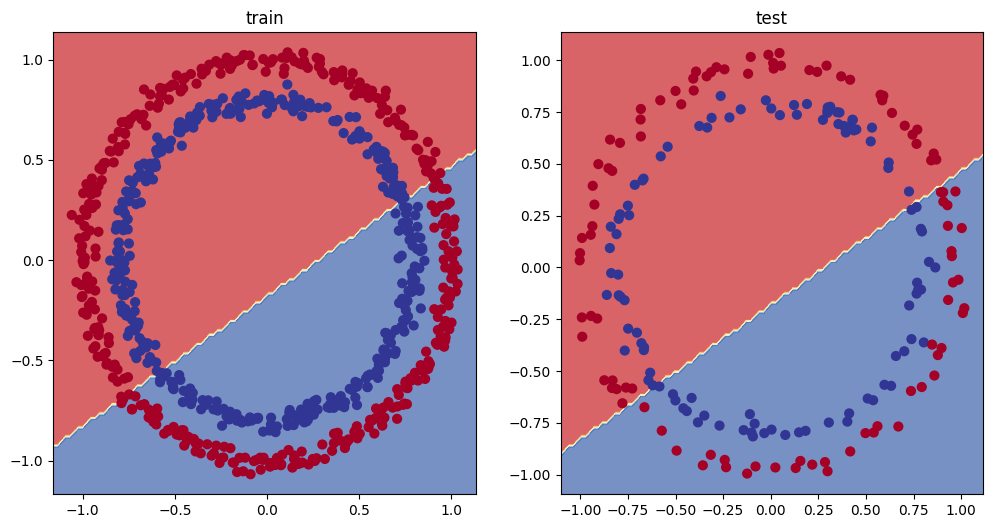

In [ ]:
#Plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_0,X_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_0,X_test, y_test)

# Improving OUR Model

1. Add more layers
2. Add more hidden layers
3. increase the number of epochs
4. Changing the activation functions
5. Change the learning rate

# New Section

In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)


  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

In [ ]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#Create a loss function

loss_fn = nn.BCEWithLogitsLoss()

#Create an optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.1)




In [ ]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

In [ ]:
#Training and evaluation loop

torch.manual_seed(42)


#Train for longer
epochs = 1000

#put data on the target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)



for epoch in range(epochs):
  ### Training
  model_1.train()

  #1. forward pass
  y_logits = model_1(X_train).squeeze()
  y_pred  = torch.round(torch.sigmoid(y_logits))


  #2. Calculate the loss and accuracy
  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true= y_train, y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (Backpropagation)
  loss.backward()

  #5. Optimizer step (Gradient Descent )
  optimizer.step()

  ### Testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    #2. Calculate the loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)


    #Print out what is happening
    if epoch % 100 == 0:
      print(f'Epoch: {epoch}| Loss: {loss:.5f}, Acc: {acc:.5f} % | Test loss: {test_loss:.2f}, TEST ACC: {test_acc:.2f}%')

Epoch: 0| Loss: 0.69396, Acc: 50.87500 % | Test loss: 0.69, TEST ACC: 51.00%
Epoch: 100| Loss: 0.69305, Acc: 50.37500 % | Test loss: 0.69, TEST ACC: 48.00%
Epoch: 200| Loss: 0.69299, Acc: 51.12500 % | Test loss: 0.69, TEST ACC: 46.00%
Epoch: 300| Loss: 0.69298, Acc: 51.62500 % | Test loss: 0.69, TEST ACC: 45.00%
Epoch: 400| Loss: 0.69298, Acc: 51.12500 % | Test loss: 0.69, TEST ACC: 46.00%
Epoch: 500| Loss: 0.69298, Acc: 51.00000 % | Test loss: 0.69, TEST ACC: 46.00%
Epoch: 600| Loss: 0.69298, Acc: 51.00000 % | Test loss: 0.69, TEST ACC: 46.00%
Epoch: 700| Loss: 0.69298, Acc: 51.00000 % | Test loss: 0.69, TEST ACC: 46.00%
Epoch: 800| Loss: 0.69298, Acc: 51.00000 % | Test loss: 0.69, TEST ACC: 46.00%
Epoch: 900| Loss: 0.69298, Acc: 51.00000 % | Test loss: 0.69, TEST ACC: 46.00%


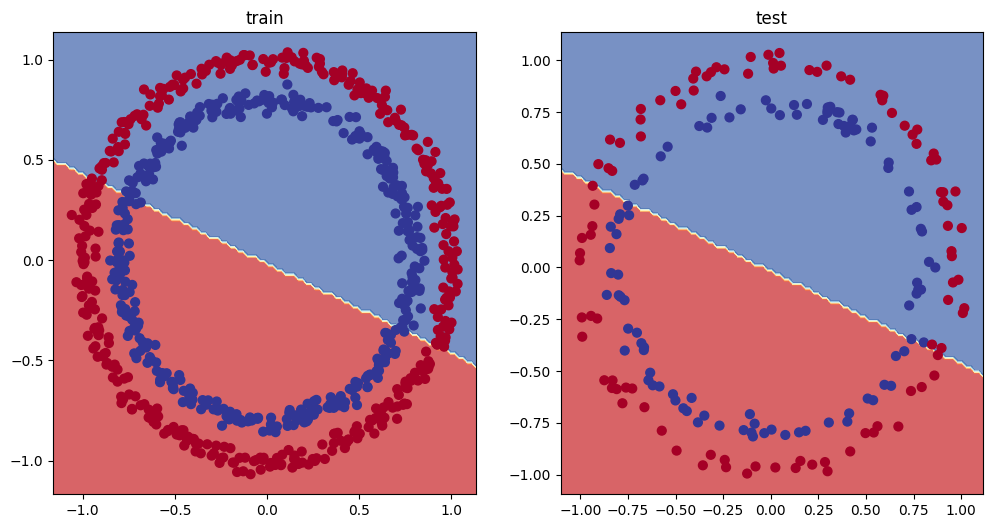

In [ ]:
#plot the decision boundary

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_1,X_train, y_train)
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_1,X_test, y_test)

# PREPARING A DATA TO SEE IF OUR MODEL CAN FIT A STRAIGHT LINE

In [ ]:
weight,bias = 0.7,0.3
start,end,step = 0,1,0.01


X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight *  X_regression + bias


print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
X_train_regression,X_test_regression,y_train_regression,y_test_regression = train_test_split(X_regression,
                                                                                              y_regression,
                                                                                              test_size=0.2,
                                                                                              #random_state=42)
                                                                                              )

In [ ]:
len(X_train_regression),len(X_test_regression)

(80, 20)

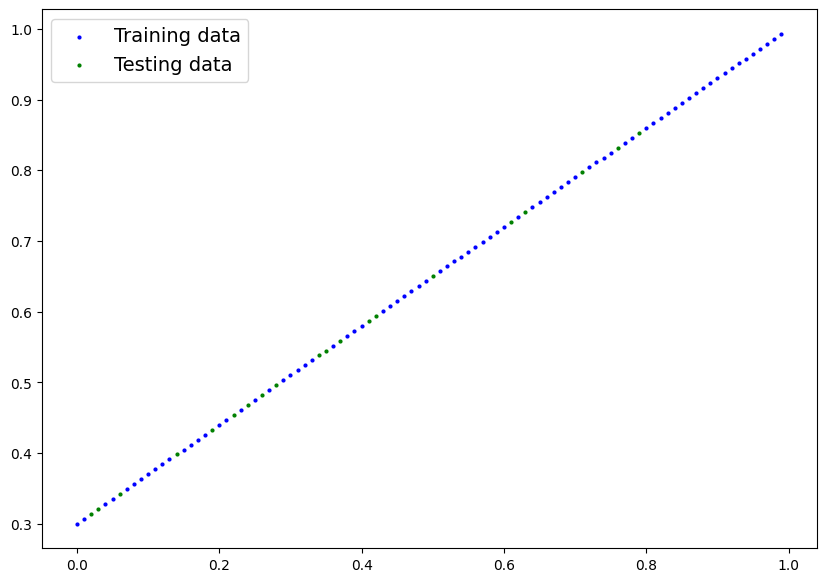

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)

Adjusting model_1 to fit a straight line

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)


model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and Optimizer

In [ ]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)


In [ ]:
# Train the model

torch.manual_seed(42)


#Set the number of epochs
epochs = 1000


#Put the data on the target device

X_train_regression,y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device), y_test_regression.to(device)


#TRaining

for epoch in range(epochs):
  y_pred = model_2 (X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #TEsting
  model_2.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)


  #Print out
  if epoch % 100 == 0:
    print(f'Epoch: {epoch}| Loss: {loss:.5f} | Test loss: {test_loss:.5f}')

Epoch: 0| Loss: 0.81115 | Test loss: 0.71002
Epoch: 100| Loss: 0.02710 | Test loss: 0.01875
Epoch: 200| Loss: 0.02553 | Test loss: 0.01836
Epoch: 300| Loss: 0.02383 | Test loss: 0.01809
Epoch: 400| Loss: 0.02474 | Test loss: 0.01769
Epoch: 500| Loss: 0.02470 | Test loss: 0.01674
Epoch: 600| Loss: 0.02374 | Test loss: 0.01666
Epoch: 700| Loss: 0.02301 | Test loss: 0.01643
Epoch: 800| Loss: 0.02225 | Test loss: 0.01644
Epoch: 900| Loss: 0.02250 | Test loss: 0.01531


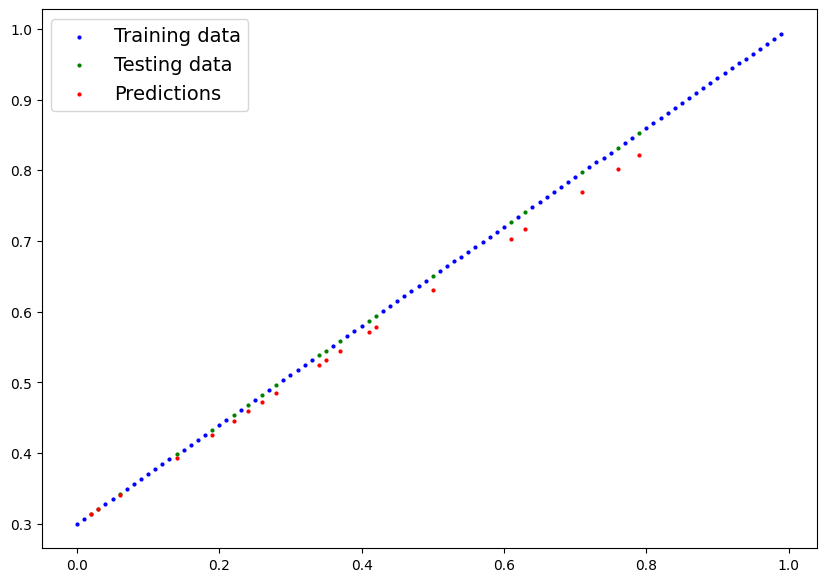

In [ ]:
# Turn on evaluation mode

model_2.eval()

#make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)


#Plot the data and predictions
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)

# The missing piece - nON-LINEARITY

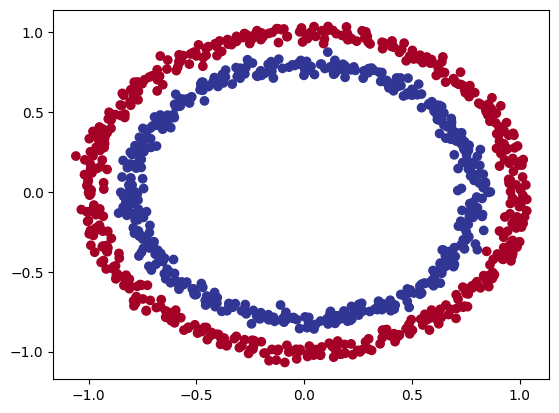

In [ ]:
## Recreating non-linear data


import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                  noise=0.03,
                  random_state=42)


plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Convert data to tensors and train and test splits

In [ ]:
import torch
from sklearn.model_selection import train_test_split

#Turn data to tensors
X = torch.from_numpy(X).type(torch.float)
y  = torch.from_numpy(y).type(torch.float)


# Split into train and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


## Building a model with non-linearity

In [ ]:
# Builidng a non-linear activation function

from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 =nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()



  def forward(self,x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))



model_3   = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
# Setup loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

## Training a model with non-linearity

In [ ]:
X_train.shape

torch.Size([800, 2])

In [ ]:
yo = model_3(X_train)
yo.shape, yo[:10]

(torch.Size([800, 1]),
 tensor([[ 0.2211],
         [-0.4154],
         [-0.1797],
         [-0.0796],
         [ 0.2082],
         [ 0.1345],
         [ 0.1423],
         [ 0.1691],
         [-0.2812],
         [-0.7394]], grad_fn=<SliceBackward0>))

In [ ]:
y_logits = model_3(X_train)
y_logits.shape

torch.Size([800, 1])

In [ ]:
 # random seed
 torch.manual_seed(42)

#Put all data to target device
X_train,y_train = X_train.to(device), y_train.to(device)
X_test,y_test = X_test.to(device), y_test.to(device)



#Loop through data

epochs = 1000


for epoch in range(epochs):
  ###Training
  model_3.train()


  #1. forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  #2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc =  accuracy_fn(y_true=y_train,
                     y_pred=y_pred)

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Optimizer step
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))


    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)




  #Print out
  if epoch % 100 == 0:
    print(f'Epoch: {epoch}| Loss: {loss:.5f}, Acc: {acc:.5f} % | Test loss: {test_loss:.2f}, TEST ACC: {test_acc:.2f}%')




Epoch: 0| Loss: 0.69295, Acc: 50.00000 % | Test loss: 0.69, TEST ACC: 50.00%
Epoch: 100| Loss: 0.69115, Acc: 52.87500 % | Test loss: 0.69, TEST ACC: 52.50%
Epoch: 200| Loss: 0.68977, Acc: 53.37500 % | Test loss: 0.69, TEST ACC: 55.00%
Epoch: 300| Loss: 0.68795, Acc: 53.00000 % | Test loss: 0.69, TEST ACC: 56.00%
Epoch: 400| Loss: 0.68517, Acc: 52.75000 % | Test loss: 0.68, TEST ACC: 56.50%
Epoch: 500| Loss: 0.68102, Acc: 52.75000 % | Test loss: 0.68, TEST ACC: 56.50%
Epoch: 600| Loss: 0.67515, Acc: 54.50000 % | Test loss: 0.67, TEST ACC: 56.00%
Epoch: 700| Loss: 0.66659, Acc: 58.37500 % | Test loss: 0.66, TEST ACC: 59.00%
Epoch: 800| Loss: 0.65160, Acc: 64.00000 % | Test loss: 0.65, TEST ACC: 67.50%
Epoch: 900| Loss: 0.62362, Acc: 74.00000 % | Test loss: 0.62, TEST ACC: 79.00%


### Evaluate a model trained with non-linear activation funcs



In [ ]:
# make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 0., 1., 0., 0., 1., 0.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

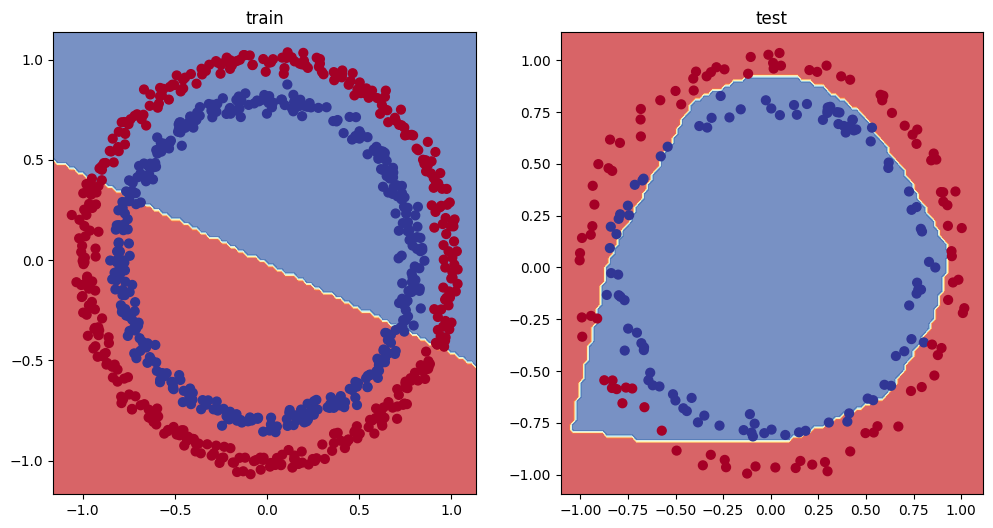

In [ ]:
# plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_1,X_train, y_train)  # Plot for model_3 on training data
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_3,X_test, y_test) # Plot for model_3 on test data

# Multi-class classification

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split



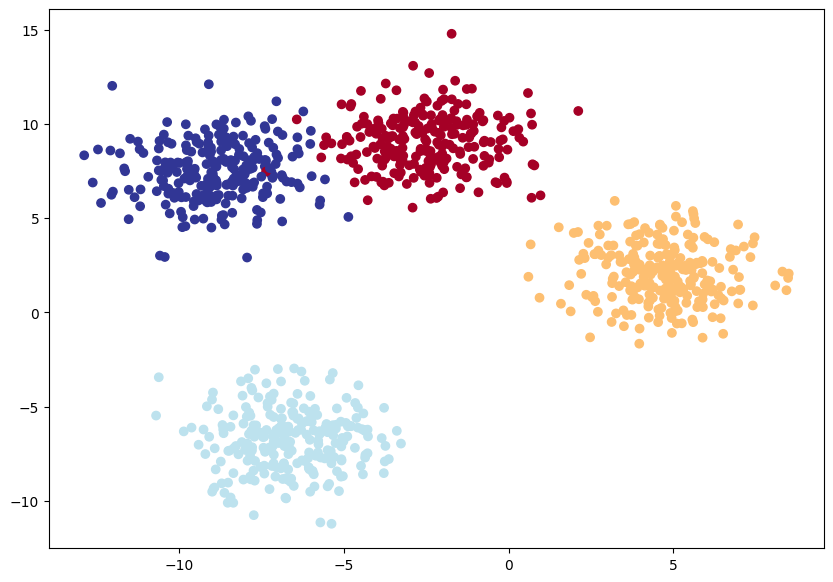

In [ ]:
# Set hyperparameters
NUM_CLASSES = 4
NUM_FEATURES= 2
RANDOM_SEED = 42

#1 . Create a multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)


# 2. turn data into tensors
X_blob =torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)


#3. SPlit into train and test
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,
                                                                      y_blob,
                                                                     test_size=0.2,
                                                                     random_state=RANDOM_SEED)



#4 .plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)



## Builiding a multi-class model

In [ ]:
#Create a device agnostic code

device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

#Create an instance of BlobModel
model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

In [ ]:
# Create a loss function and optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                         lr=0.1)



In [ ]:
# Getting prediction probabilities
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]])

In [ ]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [ ]:
# Convert our model logits to prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463],
        [0.3381, 0.1358, 0.1929, 0.3331],
        [0.2867, 0.1841, 0.2861, 0.2431],
        [0.3554, 0.1355, 0.1740, 0.3351],
        [0.3009, 0.1841, 0.2779, 0.2371],
        [0.3595, 0.1350, 0.1695, 0.3360]])

In [ ]:
torch.sum(y_pred_probs[0])

tensor(1.0000)

In [ ]:
torch.argmax(y_pred_probs[0])

tensor(1)

In [ ]:
# Convert our model prediction probabilities to prediction labels

y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10], y_blob_test[:10]

(tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.]))

## Creating training and testing loop

In [ ]:
torch.manual_seed(42)

#Set number of epochs
epochs = 100


#Put data to target device
X_blob_train,y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test,y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

#Loop through data
for epoch in range(epochs):
  ##Training
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  loss = loss_fn(y_logits, y_blob_train.type(torch.long))
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  ###Testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)

    test_loss = loss_fn(test_logits, y_blob_test.type(torch.long))
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred)


  #Print out
  if epoch % 10 == 0:
    print(f'Epoch: {epoch}| Loss: {loss:.4f}, Acc: {acc:.2f} % | Test loss: {test_loss:.4f}, TEST ACC: {test_acc:.2f}%')

Epoch: 0| Loss: 1.1588, Acc: 40.38 % | Test loss: 1.0755, TEST ACC: 48.00%
Epoch: 10| Loss: 0.6448, Acc: 96.75 % | Test loss: 0.6607, TEST ACC: 97.50%
Epoch: 20| Loss: 0.4254, Acc: 98.50 % | Test loss: 0.4307, TEST ACC: 100.00%
Epoch: 30| Loss: 0.2529, Acc: 99.12 % | Test loss: 0.2451, TEST ACC: 99.50%
Epoch: 40| Loss: 0.1123, Acc: 99.25 % | Test loss: 0.1023, TEST ACC: 99.50%
Epoch: 50| Loss: 0.0663, Acc: 99.25 % | Test loss: 0.0585, TEST ACC: 99.50%
Epoch: 60| Loss: 0.0507, Acc: 99.25 % | Test loss: 0.0429, TEST ACC: 99.50%
Epoch: 70| Loss: 0.0430, Acc: 99.25 % | Test loss: 0.0349, TEST ACC: 99.50%
Epoch: 80| Loss: 0.0384, Acc: 99.25 % | Test loss: 0.0299, TEST ACC: 99.50%
Epoch: 90| Loss: 0.0352, Acc: 99.25 % | Test loss: 0.0266, TEST ACC: 99.50%


### Visualize!!!!!

In [ ]:
# make predictions and evaluate the model

model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)


#View first 10 preds
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]])

In [ ]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [ ]:
# Go from logits ---> preds probs

y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[1.3437e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5997e-05, 2.7210e-04]])

In [ ]:
# Go from pred probs to pred labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

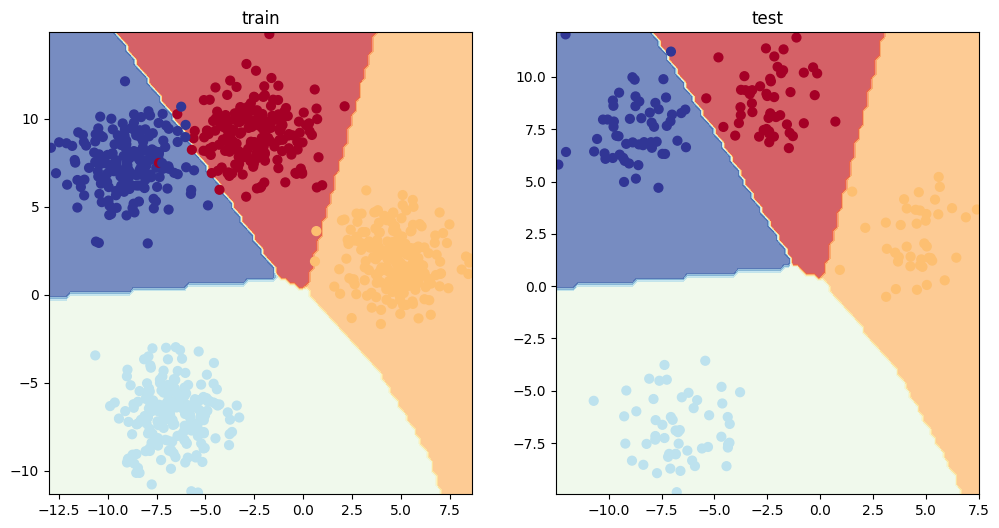

In [ ]:
#Plot

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('train')
plot_decision_boundary(model_4,X_blob_train, y_blob_train)  # Plot for model_4 on training data
plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(model_4,X_blob_test, y_blob_test) # Plot for model_4 on test data

# EVALUATION METRICS
 - ACCURACY
 - PRECISION
 - F1-SCORE
 - CONFUSION MATRIX
 - RECALL


In [ ]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 15.0 MB/s eta 0:00:00


In [ ]:
from  torchmetrics import Accuracy

In [ ]:
# Setup metric

torchmetrics_acc = Accuracy(task='multiclass', num_classes=4).to(device)

#Calculate accuracy
torchmetrics_acc(y_preds, y_blob_test)

tensor(0.9950)